In [2]:
import pandas as pd
df = pd.read_csv("../data/eda_b4s_clean.csv")
#head der bereinigten Daten anzeigen
df.head(5)  # Ausgabe der ersten Zeilen des bereinigten Data

time  feature_01  feature_02  feature_03  feature_04  \
0  2020-03-02 23:15:00       30014           0        2612           0   
1  2020-03-02 23:30:00       27356           0        2538           0   
2  2020-03-02 23:45:00       25930           0        2544           0   
3  2020-03-03 00:00:00       24318           0        2432           0   
4  2020-03-03 00:15:00       24300           0        2460           0   

   feature_05  feature_06  Nettolast_P_kW  Nettolast_Q_kvar  Holiday  \
0           0        8200          30.014            -5.588        0   
1           0        8322          27.356            -5.784        0   
2           0        8302          25.930            -5.758        0   
3           0        8296          24.318            -5.864        0   
4           0        8082          24.300            -5.622        0   

   feature_08  feature_09  feature_10  feature_11  feature_12  feature_13  \
0       244.0       5.925        11.6         0.0       0.100       3.450   
1       244.0       5.700        11.6         0.0       0.100       3.300   
2       245.0       5.750        11.6         0.0       0.100       3.275   
3       245.0       5.800        11.6         0.0       0.100       3.250   
4       245.0       5.850        11.9         0.0       0.025       3.225   

   hour  weekday  is_weekend  
0    23        0           0  
1    23        0           0  
2    23        0           0  
3     0        1           0  
4     0        1           0

In [4]:
df['Season'] = pd.to_datetime(df['time']).dt.month % 12 // 3 + 1


In [5]:
# Feature aus dem Net Load zwei Tage vorher (bei 96 Zeitpunkten pro Tag)

# Gestern (d-1) = 96 Schritte zurück
df['Net Load (d-1)'] = df['Nettolast_P_kW'].shift(96)

# Vorgestern (d-2) = 192 Schritte zurück
df['Net Load (d-2)'] = df['Nettolast_P_kW'].shift(192)

# Letzte Woche (d-7) = 672 Schritte zurück (96 Schritte pro Tag * 7 Tage
df['Net Load (d-7)'] = df['Nettolast_P_kW'].shift(96 * 7)

# Zielwert um 96 Zeitschritte (24h) verschieben → zukünftiger Net Load
df['Net Load (t+96)'] = df['Nettolast_P_kW'].shift(-96)






In [6]:
df = df.dropna().reset_index(drop=True)

#speichern der bereinigten Daten
df.to_csv("../data/eda_b4s_clean_d-2.csv", index=False)


In [7]:
print(df.columns.tolist())
#head der bereinigten Daten anzeigen
df.head(5)  # Ausgabe der ersten Zeilen des bereinigten DataFrames

['time', 'feature_01', 'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06', 'Nettolast_P_kW', 'Nettolast_Q_kvar', 'Holiday', 'feature_08', 'feature_09', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'hour', 'weekday', 'is_weekend', 'Net Load (d-1)', 'Net Load (d-2)', 'Net Load (d-7)', 'Net Load (t+96)', 'Season']


time  feature_01  feature_02  feature_03  feature_04  \
0  2020-03-09 23:15:00       50204           0        4972           0   
1  2020-03-09 23:30:00       52932           0        4832           0   
2  2020-03-09 23:45:00       54048           0        4760           0   
3  2020-03-10 00:00:00       52132           0        4732           0   
4  2020-03-10 00:15:00       48624           0        4636           0   

   feature_05  feature_06  Nettolast_P_kW  Nettolast_Q_kvar  Holiday  ...  \
0           0       16108          50.204           -11.136        0  ...   
1           0       16556          52.932           -11.724        0  ...   
2           0       16168          54.048           -11.408        0  ...   
3           0       16052          52.132           -11.320        0  ...   
4           0       16356          48.624           -11.720        0  ...   

   feature_12  feature_13  hour  weekday  is_weekend  Net Load (d-1)  \
0         0.0       3.250    23        0           0          62.116   
1         0.0       3.200    23        0           0          62.360   
2         0.0       3.125    23        0           0          54.176   
3         0.0       3.050     0        1           0          48.724   
4         0.0       2.975     0        1           0          48.624   

   Net Load (d-2)  Net Load (d-7)  Net Load (t+96)  Season  
0          65.888          30.014           56.100       2  
1          67.096          27.356           54.848       2  
2          56.656          25.930           50.364       2  
3          55.444          24.318           46.728       2  
4          58.740          24.300           48.992       2  

[5 rows x 24 columns]

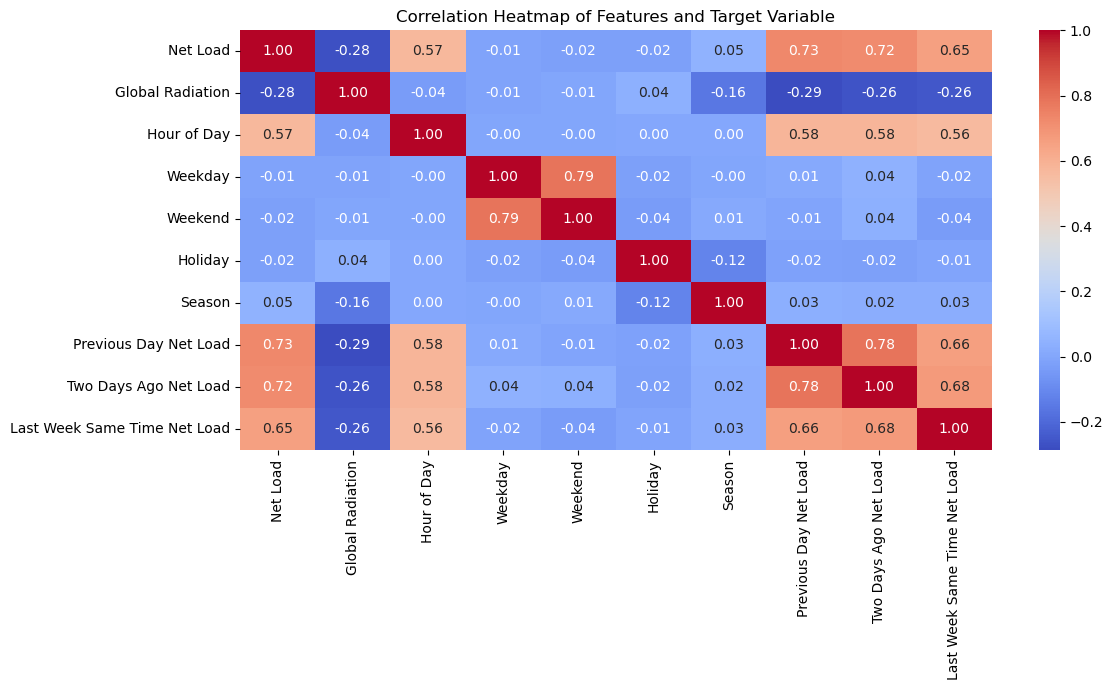

In [8]:
# Nach Kernel-Reset: Alles erneut laden und berechnen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
df = pd.read_csv("../data/eda_b4s_clean.csv")


# Zeitbasierte Features berechnen
df['Net Load (d-1)'] = df['Nettolast_P_kW'].shift(96)
df['Net Load (d-2)'] = df['Nettolast_P_kW'].shift(192)
df['Net Load (d-7)'] = df['Nettolast_P_kW'].shift(96 * 7)
df['Net Load (t+96)'] = df['Nettolast_P_kW'].shift(-96)

# Season-Spalte aus Zeit berechnen
df['time'] = pd.to_datetime(df['time'])
df['Season'] = df['time'].dt.month % 12 // 3 + 1

# Spalten umbenennen für Klarheit
df = df.rename(columns={
    'feature_11': 'Global Radiation',
    'hour': 'Hour of Day',
    'weekday': 'Weekday',
    'is_weekend': 'Weekend'
})

# Relevante Spalten für Heatmap (inkl. Season)
df_heatmap = df[[
    'Net Load (t+96)', 'Global Radiation', 'Hour of Day', 'Weekday',
    'Weekend', 'Holiday', 'Season',
    'Net Load (d-1)', 'Net Load (d-2)', 'Net Load (d-7)'
]].dropna()

# Spalten umbenennen für Plot
df_heatmap = df_heatmap.rename(columns={
    'Net Load (t+96)': 'Net Load',
    'Net Load (d-1)': 'Previous Day Net Load',
    'Net Load (d-2)': 'Two Days Ago Net Load',
    'Net Load (d-7)': 'Last Week Same Time Net Load'
})

# Korrelationsmatrix plotten
plt.figure(figsize=(12, 7))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features and Target Variable")
plt.tight_layout()
plt.show()


In [9]:
# Machine Learning mit d-2 mit one hot encoding der Zeitkategorien
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = df.dropna().reset_index(drop=True)

# Ergebnisse speichern
results = []

# One-Hot-Encoding
hour_dummies = pd.get_dummies(df['Hour of Day'], prefix='Hour')
df = pd.concat([df, hour_dummies], axis=1)

# Neue Featureliste
features = [
    'Global Radiation', 'Weekday', 'Weekend', 'Holiday', 'Previous Day Net Load'
] + list(hour_dummies.columns)


target = 'Net Load (kW)'

# Eingabedaten vorbereiten
X = df.rename(columns={
    'Nettolast_P_kW': 'Net Load (kW)',
    'feature_11': 'Global Radiation',
    'hour': 'Hour of Day',
    'weekday': 'Weekday',
    'is_weekend': 'Weekend',
    'Net Load (d-1)': 'Previous Day Net Load'
})[features]

y = df['Nettolast_P_kW']


# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Random Forest (mit GridSearchCV)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

results.append({
    "Modell": "Random Forest (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R²": r2_score(y_test, y_pred_rf)
})

#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
best_gbr = gbr_grid.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

results.append({
    "Modell": "Gradient Boosting (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_gbr ),
    "R²": r2_score(y_test, y_pred_gbr)
})

#XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

results.append({
    "Modell": "XGBoost (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "R²": r2_score(y_test, y_pred_xgb)
})

import joblib

# Speichern
joblib.dump(best_rf_model, "../data/xgb_model.pkl")

# LightGBM
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_grid.fit(X_train, y_train)
best_lgbm = lgbm_grid.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)

results.append({
    "Modell": "LightGBM (Tuned)",
    "MAE": mean_absolute_error(y_test,  y_pred_lgbm),
    "R²": r2_score(y_test, y_pred_lgbm)
})

# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7, 9]
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

results.append({
    "Modell": "KNN (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_knn),
    "R²": r2_score(y_test, y_pred_knn)
})

#SVR (Support Vector Regression)
from sklearn.svm import SVR

svr = SVR()
svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_
y_pred_svr = best_svr.predict(X_test)

results.append({
    "Modell": "SVR (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_svr),
    "R²": r2_score(y_test, y_pred_svr)
})

#Ridge & Lasso Regression
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
results.append({
    "Modell": "Ridge Regression (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_ridge),
    "R²": r2_score(y_test, y_pred_ridge)
})

# Lasso
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
results.append({
    "Modell": "Lasso Regression (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_lasso),
    "R²": r2_score(y_test, y_pred_lasso)
})



results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
print("🔍 Modellvergleich (Tuned):")
print(results_df)

print("🔍 Modellvergleich (Tuned):")
print(results_df.to_string(index=False))  # schöner formatiert


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 16571, number of used features: 29
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Start training from score 52.050227
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 16571, number of used features: 29
[LightGBM] [Info] Start training from score 52.149492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [13]:
print(results_df.to_string(index=False))

                   Modell      MAE       R²
          XGBoost (Tuned) 6.755709 0.813803
Gradient Boosting (Tuned) 6.804205 0.812173
         LightGBM (Tuned) 6.825612 0.810949
    Random Forest (Tuned) 6.904226 0.804118
 Ridge Regression (Tuned) 7.411271 0.781098
 Lasso Regression (Tuned) 7.411931 0.781085
              KNN (Tuned) 8.361397 0.719521
              SVR (Tuned) 8.530035 0.706889


In [ ]:
# # Machine Learning mit d-2 aber mit time Category
# import pandas as pd

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error

# df = df.dropna().reset_index(drop=True)

# # Ergebnisse speichern
# results = []

# def get_time_category(hour):
#     if 0 <= hour < 6 or hour == 23:
#         return 'Night'
#     elif 6 <= hour < 15:
#         return 'Morning/Noon'
#     elif 15 <= hour <= 22:
#         return 'Afternoon/Evening'

# df['Time Category'] = df['Hour of Day'].apply(get_time_category)

# time_cat_dummies = pd.get_dummies(df['Time Category'], prefix='TimeCat')
# df = pd.concat([df, time_cat_dummies], axis=1)


# # Features und Ziel definieren
# features = [
#     'Global Radiation', 'Weekday', 'Weekend', 'Holiday', 'Previous Day Net Load',
#     'TimeCat_Night', 'TimeCat_Morning/Noon', 'TimeCat_Afternoon/Evening'
# ]

# target = 'Net Load (kW)'

# # Eingabedaten vorbereiten
# X = df.rename(columns={
#     'Nettolast_P_kW': 'Net Load (kW)',
#     'feature_11': 'Global Radiation',
#     'hour': 'Hour of Day',
#     'weekday': 'Weekday',
#     'is_weekend': 'Weekend',
#     'Net Load (d-1)': 'Previous Day Net Load'
# })[features]

# y = df['Nettolast_P_kW']


# # Train/Test-Split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# #Random Forest (mit GridSearchCV)
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(random_state=42)
# rf_params = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# rf_grid.fit(X_train, y_train)
# best_rf_model = rf_grid.best_estimator_
# y_pred_rf = best_rf_model.predict(X_test)

# results.append({
#     "Modell": "Random Forest (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_rf),
#     "R²": r2_score(y_test, y_pred_rf)
# })

# #Gradient Boosting Regressor
# from sklearn.ensemble import GradientBoostingRegressor

# gbr = GradientBoostingRegressor(random_state=42)
# gbr_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5],
#     'subsample': [0.8, 1.0]
# }

# gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# gbr_grid.fit(X_train, y_train)
# best_gbr = gbr_grid.best_estimator_
# y_pred_gbr = best_gbr.predict(X_test)

# results.append({
#     "Modell": "Gradient Boosting (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_gbr ),
#     "R²": r2_score(y_test, y_pred_gbr)
# })

# #XGBoost
# from xgboost import XGBRegressor

# xgb = XGBRegressor(random_state=42)
# xgb_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5],
#     'subsample': [0.8, 1.0]
# }

# xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# xgb_grid.fit(X_train, y_train)
# best_xgb = xgb_grid.best_estimator_
# y_pred_xgb = best_xgb.predict(X_test)

# results.append({
#     "Modell": "XGBoost (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_xgb),
#     "R²": r2_score(y_test, y_pred_xgb)
# })

# import joblib

# # Speichern
# joblib.dump(best_rf_model, "../data/xgb_model.pkl")

# # LightGBM
# from lightgbm import LGBMRegressor

# lgbm = LGBMRegressor(random_state=42)
# lgbm_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5],
#     'subsample': [0.8, 1.0]
# }

# lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# lgbm_grid.fit(X_train, y_train)
# best_lgbm = lgbm_grid.best_estimator_
# y_pred_lgbm = best_lgbm.predict(X_test)

# results.append({
#     "Modell": "LightGBM (Tuned)",
#     "MAE": mean_absolute_error(y_test,  y_pred_lgbm),
#     "R²": r2_score(y_test, y_pred_lgbm)
# })

# # KNN Regressor
# from sklearn.neighbors import KNeighborsRegressor

# knn = KNeighborsRegressor()
# knn_params = {
#     'n_neighbors': [3, 5, 7, 9]
# }

# knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# knn_grid.fit(X_train, y_train)
# best_knn = knn_grid.best_estimator_
# y_pred_knn = best_knn.predict(X_test)

# results.append({
#     "Modell": "KNN (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_knn),
#     "R²": r2_score(y_test, y_pred_knn)
# })

# #SVR (Support Vector Regression)
# from sklearn.svm import SVR

# svr = SVR()
# svr_params = {
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 0.5],
#     'kernel': ['rbf']
# }

# svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# svr_grid.fit(X_train, y_train)
# best_svr = svr_grid.best_estimator_
# y_pred_svr = best_svr.predict(X_test)

# results.append({
#     "Modell": "SVR (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_svr),
#     "R²": r2_score(y_test, y_pred_svr)
# })

# #Ridge & Lasso Regression
# from sklearn.linear_model import Ridge, Lasso

# # Ridge
# ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
# ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# ridge_grid.fit(X_train, y_train)
# best_ridge = ridge_grid.best_estimator_
# y_pred_ridge = best_ridge.predict(X_test)
# results.append({
#     "Modell": "Ridge Regression (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_ridge),
#     "R²": r2_score(y_test, y_pred_ridge)
# })

# # Lasso
# lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}
# lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# lasso_grid.fit(X_train, y_train)
# best_lasso = lasso_grid.best_estimator_
# y_pred_lasso = best_lasso.predict(X_test)
# results.append({
#     "Modell": "Lasso Regression (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_lasso),
#     "R²": r2_score(y_test, y_pred_lasso)
# })



# results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
# print("🔍 Modellvergleich (Tuned):")
# print(results_df)

# print("🔍 Modellvergleich (Tuned):")
# print(results_df.to_string(index=False))  # schöner formatiert


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 16571, number of used features: 8
[LightGBM] [Info] Start training from score 52.050227
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 16571, number of used features: 8
[LightGBM

In [ ]:
#print(results_df.to_string(index=False))

                   Modell      MAE       R²
          XGBoost (Tuned) 7.622186 0.772367
         LightGBM (Tuned) 7.632186 0.771807
Gradient Boosting (Tuned) 7.649530 0.771123
    Random Forest (Tuned) 7.636676 0.769834
 Lasso Regression (Tuned) 8.734236 0.718707
 Ridge Regression (Tuned) 8.734373 0.718703
              KNN (Tuned) 8.524670 0.715973
              SVR (Tuned) 8.510755 0.708379


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error

# df = df.dropna().reset_index(drop=True)

# # Ergebnisse speichern
# results = []

# # Features und Ziel definieren
# features = [
#     'Global Radiation', 'Hour of Day', 'Weekday', 'Weekend', 'Holiday', 'Previous Day Net Load'
# ]
# target = 'Net Load (kW)'

# # Eingabedaten vorbereiten
# X = df.rename(columns={
#     'Nettolast_P_kW': 'Net Load (kW)',
#     'feature_11': 'Global Radiation',
#     'hour': 'Hour of Day',
#     'weekday': 'Weekday',
#     'is_weekend': 'Weekend',
#     'Net Load (d-1)': 'Previous Day Net Load'
# })[features]

# y = df['Nettolast_P_kW']


# # Train/Test-Split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# #Random Forest (mit GridSearchCV)
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(random_state=42)
# rf_params = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# rf_grid.fit(X_train, y_train)
# best_rf_model = rf_grid.best_estimator_
# y_pred_rf = best_rf_model.predict(X_test)

# results.append({
#     "Modell": "Random Forest (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_rf),
#     "R²": r2_score(y_test, y_pred_rf)
# })

# #Gradient Boosting Regressor
# from sklearn.ensemble import GradientBoostingRegressor

# gbr = GradientBoostingRegressor(random_state=42)
# gbr_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5],
#     'subsample': [0.8, 1.0]
# }

# gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# gbr_grid.fit(X_train, y_train)
# best_gbr = gbr_grid.best_estimator_
# y_pred_gbr = best_gbr.predict(X_test)

# results.append({
#     "Modell": "Gradient Boosting (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_gbr ),
#     "R²": r2_score(y_test, y_pred_gbr)
# })

# #XGBoost
# from xgboost import XGBRegressor

# xgb = XGBRegressor(random_state=42)
# xgb_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5],
#     'subsample': [0.8, 1.0]
# }

# xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# xgb_grid.fit(X_train, y_train)
# best_xgb = xgb_grid.best_estimator_
# y_pred_xgb = best_xgb.predict(X_test)

# results.append({
#     "Modell": "XGBoost (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_xgb),
#     "R²": r2_score(y_test, y_pred_xgb)
# })

# import joblib

# # Speichern
# joblib.dump(best_rf_model, "../data/xgb_model.pkl")

# # LightGBM
# from lightgbm import LGBMRegressor

# lgbm = LGBMRegressor(random_state=42)
# lgbm_params = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [3, 5],
#     'subsample': [0.8, 1.0]
# }

# lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# lgbm_grid.fit(X_train, y_train)
# best_lgbm = lgbm_grid.best_estimator_
# y_pred_lgbm = best_lgbm.predict(X_test)

# results.append({
#     "Modell": "LightGBM (Tuned)",
#     "MAE": mean_absolute_error(y_test,  y_pred_lgbm),
#     "R²": r2_score(y_test, y_pred_lgbm)
# })

# # KNN Regressor
# from sklearn.neighbors import KNeighborsRegressor

# knn = KNeighborsRegressor()
# knn_params = {
#     'n_neighbors': [3, 5, 7, 9]
# }

# knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# knn_grid.fit(X_train, y_train)
# best_knn = knn_grid.best_estimator_
# y_pred_knn = best_knn.predict(X_test)

# results.append({
#     "Modell": "KNN (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_knn),
#     "R²": r2_score(y_test, y_pred_knn)
# })

# #SVR (Support Vector Regression)
# from sklearn.svm import SVR

# svr = SVR()
# svr_params = {
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 0.5],
#     'kernel': ['rbf']
# }

# svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# svr_grid.fit(X_train, y_train)
# best_svr = svr_grid.best_estimator_
# y_pred_svr = best_svr.predict(X_test)

# results.append({
#     "Modell": "SVR (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_svr),
#     "R²": r2_score(y_test, y_pred_svr)
# })

# #Ridge & Lasso Regression
# from sklearn.linear_model import Ridge, Lasso

# # Ridge
# ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
# ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# ridge_grid.fit(X_train, y_train)
# best_ridge = ridge_grid.best_estimator_
# y_pred_ridge = best_ridge.predict(X_test)
# results.append({
#     "Modell": "Ridge Regression (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_ridge),
#     "R²": r2_score(y_test, y_pred_ridge)
# })

# # Lasso
# lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}
# lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# lasso_grid.fit(X_train, y_train)
# best_lasso = lasso_grid.best_estimator_
# y_pred_lasso = best_lasso.predict(X_test)
# results.append({
#     "Modell": "Lasso Regression (Tuned)",
#     "MAE": mean_absolute_error(y_test, y_pred_lasso),
#     "R²": r2_score(y_test, y_pred_lasso)
# })



# results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
# print("🔍 Modellvergleich (Tuned):")
# print(results_df)

# print("🔍 Modellvergleich (Tuned):")
# print(results_df.to_string(index=False))  # schöner formatiert


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 16571, number of used features: 6
[LightGBM] [Info] Start training from score 52.149492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive ga

In [ ]:
#print(results_df.to_string(index=False))


                   Modell      MAE       R²
         LightGBM (Tuned) 6.681966 0.817888
          XGBoost (Tuned) 6.718120 0.816895
Gradient Boosting (Tuned) 6.767416 0.815283
    Random Forest (Tuned) 6.812293 0.810305
              KNN (Tuned) 7.737779 0.762368
              SVR (Tuned) 8.278710 0.726893
 Ridge Regression (Tuned) 9.410748 0.676191
 Lasso Regression (Tuned) 9.410739 0.676191


In [109]:
grid = GridSearchCV(lgbm, lgbm_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# 📌 Beste Parameter anzeigen
print("🔧 Beste Hyperparameter:")
print(grid.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 13809, number of used features: 6
[LightGBM] [Info] Start training from score 52.015426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_row_wis

In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings

warnings.filterwarnings("ignore")

# Beispiel-Dummy-Daten laden (hier würde normalerweise df_heatmap verwendet werden)
# Simulation des DataFrames mit richtigen Spaltennamen
np.random.seed(42)
size = 1000
df_heatmap = pd.DataFrame({
    'Global Radiation': np.random.rand(size) * 1000,
    'Hour of Day': np.random.randint(0, 24, size),
    'Weekday': np.random.randint(0, 7, size),
    'Weekend': np.random.randint(0, 2, size),
    'Holiday': np.random.randint(0, 2, size),
    'Previous Day Net Load': np.random.rand(size) * 100,
    'Next Day Net Load (Same Time)': np.random.rand(size) * 100
})

features = [
    'Global Radiation', 'Hour of Day', 'Weekday', 'Weekend', 'Holiday',
    'Previous Day Net Load'
]
target = 'Next Day Net Load (Same Time)'

X = df_heatmap[features]
y = df_heatmap[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

def evaluate_model(name, model, param_grid):
    try:
        grid = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1, verbose=0)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        results.append({
            "Modell": name,
            "MAE": mean_absolute_error(y_test, y_pred),
            "R²": r2_score(y_test, y_pred)
        })
    except Exception as e:
        results.append({
            "Modell": name,
            "MAE": None,
            "R²": None,
            "Error": str(e)
        })

# Modellkonfigurationen
model_configs = [
    ("Random Forest (Tuned)", RandomForestRegressor(random_state=42), {
        'n_estimators': [100],
        'max_depth': [10],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    }),
    ("Gradient Boosting (Tuned)", GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3]
    }),
    ("XGBoost (Tuned)", XGBRegressor(random_state=42, verbosity=0), {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3]
    }),
    ("LightGBM (Tuned)", LGBMRegressor(random_state=42), {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3]
    }),
    ("KNN (Tuned)", KNeighborsRegressor(), {
        'n_neighbors': [3, 5]
    }),
    ("SVR (Tuned)", SVR(), {
        'C': [1],
        'epsilon': [0.1],
        'kernel': ['rbf']
    }),
    ("Ridge Regression (Tuned)", Ridge(), {
        'alpha': [1]
    }),
    ("Lasso Regression (Tuned)", Lasso(max_iter=10000), {
        'alpha': [0.1]
    })
]

for name, model, params in model_configs:
    evaluate_model(name, model, params)

results_df = pd.DataFrame(results).sort_values("R²", ascending=False).reset_index(drop=True)

print("🔍 Modellvergleich (Tuned):")        
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 533, number of used features: 6
[LightGBM] [Info] Start training from score 49.316405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [102]:
print(X_train.shape, y_train.shape)
print(X_train.isnull().sum())


(20714, 6) (20714,)
Global Radiation         0
Hour of Day              0
Weekday                  0
Weekend                  0
Holiday                  0
Previous Day Net Load    0
dtype: int64


In [94]:
print(X_train.isnull().sum())
print(X_train.columns)
print(X_train.shape, y_train.shape)


Global Radiation         0
Hour of Day              0
Weekday                  0
Weekend                  0
Holiday                  0
Previous Day Net Load    0
dtype: int64
Index(['Global Radiation', 'Hour of Day', 'Weekday', 'Weekend', 'Holiday',
       'Previous Day Net Load'],
      dtype='object')
(20714, 6) (20714,)


In [95]:
try:
    rf_grid.fit(X_train, y_train)
    best_rf_model = rf_grid.best_estimator_
    y_pred_rf = best_rf_model.predict(X_test)
    results.append({
        "Modell": "Random Forest (Tuned)",
        "MAE": mean_absolute_error(y_test, y_pred_rf),
        "R²": r2_score(y_test, y_pred_rf)
    })
except Exception as e:
    print("❌ Fehler bei Random Forest:", e)


/opt/anaconda3/envs/EDA/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
#Random Forest (mit GridSearchCV)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

results.append({
    "Modell": "Random Forest (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R²": r2_score(y_test, y_pred_rf)
})


In [ ]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
best_gbr = gbr_grid.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

results.append({
    "Modell": "Gradient Boosting (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R²": r2_score(y_test, y_pred_gbr)
})


In [89]:
#XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

results.append({
    "Modell": "XGBoost (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R²": r2_score(y_test, y_pred_xgb)
})

import joblib

# Speichern
joblib.dump(best_rf_model, "../data/xgb_model.pkl")


['../data/xgb_model.pkl']

In [90]:
# LightGBM
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_grid.fit(X_train, y_train)
best_lgbm = lgbm_grid.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)

results.append({
    "Modell": "LightGBM (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R²": r2_score(y_test, y_pred_lgbm)
})


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 16571, number of used features: 6
[LightGBM] [Info] Start training from score 52.086859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, th

In [52]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7, 9]
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

results.append({
    "Modell": "KNN (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_knn),
    "R²": r2_score(y_test, y_pred_knn)
})


In [ ]:
#SVR (Support Vector Regression)
from sklearn.svm import SVR

svr = SVR()
svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_
y_pred_svr = best_svr.predict(X_test)

results.append({
    "Modell": "SVR (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R²": r2_score(y_test, y_pred_svr)
})


In [ ]:
#Ridge & Lasso Regression
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
results.append({
    "Modell": "Ridge Regression (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_ridge),
    "R²": r2_score(y_test, y_pred_ridge)
})

# Lasso
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
results.append({
    "Modell": "Lasso Regression (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "R²": r2_score(y_test, y_pred_lasso)
})


In [56]:
import pandas as pd

results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
print("🔍 Modellvergleich (Tuned):")
print(results_df)


🔍 Modellvergleich (Tuned):
                      Modell         MSE        R²
0      Random Forest (Tuned)  127.605945  0.719307
2            XGBoost (Tuned)  129.140594  0.715931
3           LightGBM (Tuned)  129.743491  0.714605
1  Gradient Boosting (Tuned)  129.779343  0.714526
4                KNN (Tuned)  157.195214  0.654219
5                SVR (Tuned)  169.865389  0.626349
6   Ridge Regression (Tuned)  189.045490  0.584159
7   Lasso Regression (Tuned)  189.046755  0.584156


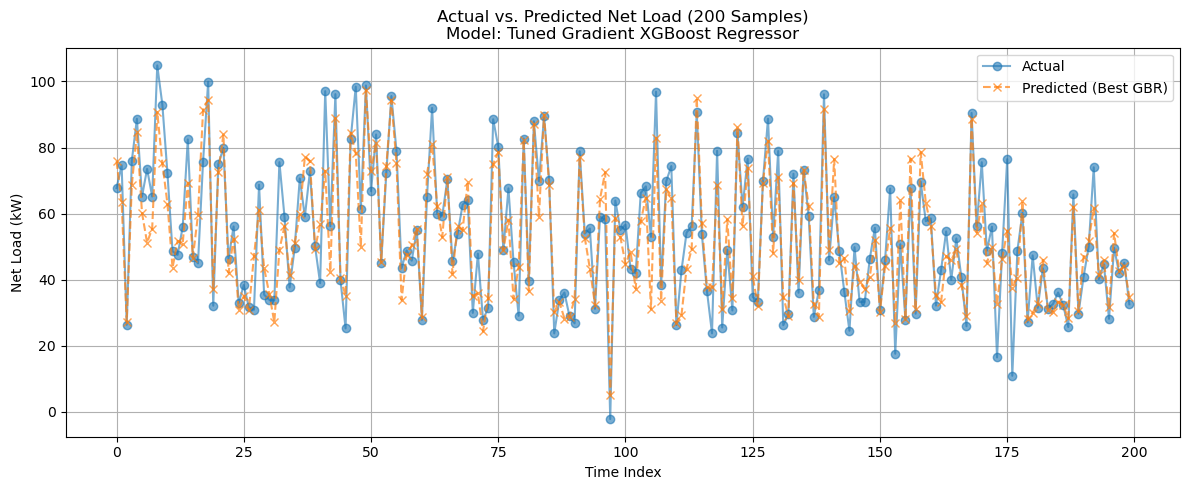

Mean Absolute Error (MAE): 6.76
R²-Score: 0.8138


In [11]:
# Vorhersageplot mit dem besten Modell (Gradient Boosting Regressor)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


# Vorhersageplot mit bestem Modell (RandomizedSearchCV)
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label="Actual", marker='o', linestyle='-', alpha=0.6)
plt.plot(y_pred_xgb[:200], label="Predicted (Best GBR)", marker='x', linestyle='--', alpha=0.7)
plt.xlabel("Time Index")
plt.ylabel("Net Load (kW)")
plt.title("Actual vs. Predicted Net Load (200 Samples)\nModel: Tuned Gradient XGBoost Regressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Metriken ausgeben
mae_rand = mean_absolute_error(y_test, y_pred_xgb)
r2_rand = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae_rand:.2f}")
print(f"R²-Score: {r2_rand:.4f}")


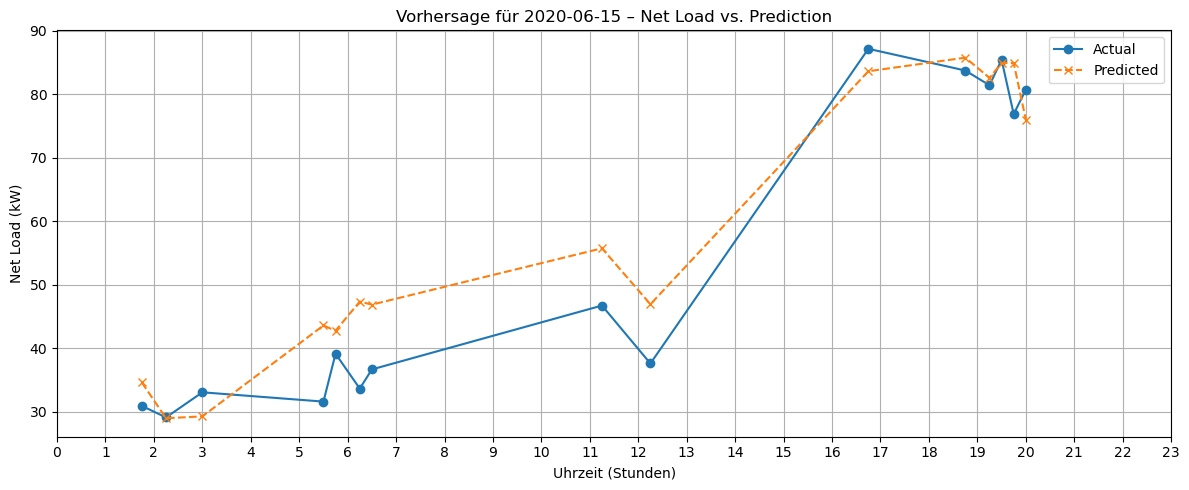

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. DataFrame mit Zeit, echten und vorhergesagten Werten
df_plot = pd.DataFrame({
    "time": df.loc[y_test.index, "time"],
    "actual": y_test.values,
    "predicted": y_pred_xgb  # oder y_pred_gbr, je nach Modell
})

# 2. Stelle sicher, dass Zeitspalte datetime ist
df_plot["time"] = pd.to_datetime(df_plot["time"])

# 3. Wähle einen Tag aus (z. B. 2020-06-15)
selected_day = "2020-06-15"
mask = df_plot["time"].dt.date == pd.to_datetime(selected_day).date()
df_day = df_plot[mask].copy()

# 4. Sortiere nach Zeit (wichtig für glatten Plot)
df_day = df_day.sort_values("time")

# 5. Extrahiere Uhrzeit in Dezimalform
df_day["hour_decimal"] = df_day["time"].dt.hour + df_day["time"].dt.minute / 60

plt.figure(figsize=(12, 5))
plt.plot(df_day["hour_decimal"], df_day["actual"], label="Actual", marker='o', linestyle='-')
plt.plot(df_day["hour_decimal"], df_day["predicted"], label="Predicted", marker='x', linestyle='--')

plt.xlabel("Uhrzeit (Stunden)")
plt.ylabel("Net Load (kW)")
plt.title(f"Vorhersage für {selected_day} – Net Load vs. Prediction")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


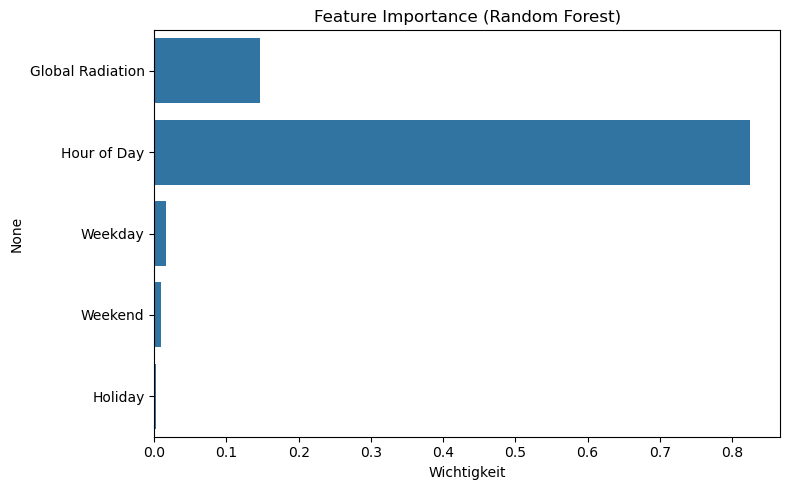

In [22]:
# Visualisierung der Feature-Wichtigkeit
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Wichtigkeit")
plt.tight_layout()
plt.show()


15:31:52 - cmdstanpy - INFO - Chain [1] start processing
15:31:53 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/EDA/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
/opt/anaconda3/envs/EDA/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/EDA/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.hi

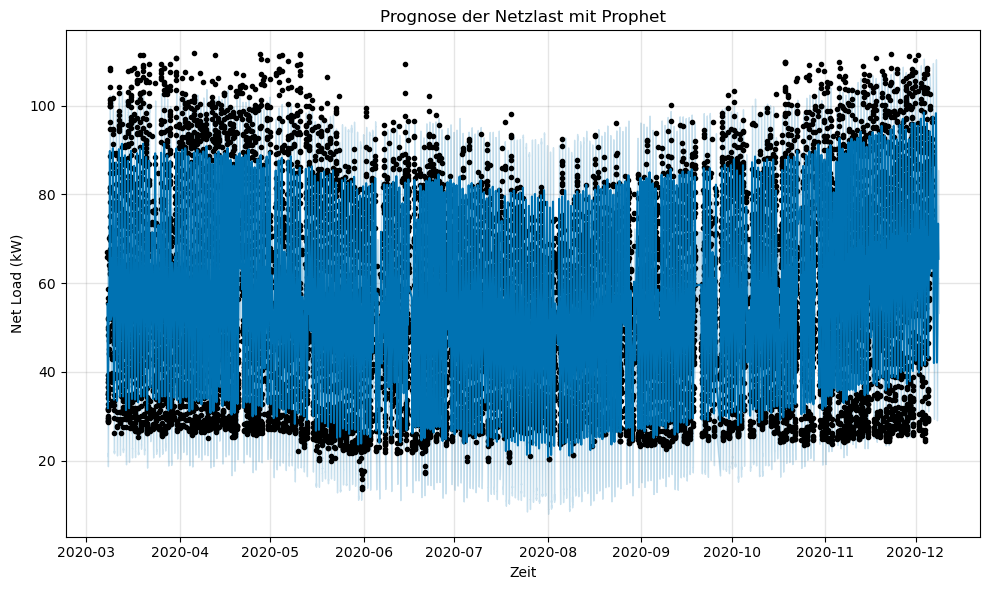

In [ ]:
# from prophet import Prophet
# import pandas as pd

# # Prophet erwartet Spalten: ds = datetime, y = Wert
# df_prophet = df[["time", "Nettolast_P_kW"]].rename(columns={
#     "time": "ds",
#     "Nettolast_P_kW": "y"
# })

# model = Prophet(daily_seasonality=True, weekly_seasonality=True)
# model.fit(df_prophet)

# future = model.make_future_dataframe(periods=48, freq="H")  # z. B. 48 Stunden
# forecast = model.predict(future)

# model.plot(forecast)
# plt.title("Prognose der Netzlast mit Prophet")
# plt.xlabel("Zeit")
# plt.ylabel("Net Load (kW)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [ ]:
# # Stelle sicher, dass beide 'ds' Spalten vom Typ datetime sind
# df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])
# forecast["ds"] = pd.to_datetime(forecast["ds"])

# # Jetzt kannst du sicher mergen
# forecast_with_truth = forecast.merge(df_prophet, on="ds", how="left")

# valid_rows = forecast_with_truth.dropna(subset=["y"])

# from sklearn.metrics import r2_score
# r2 = r2_score(valid_rows["y"], valid_rows["yhat"])
# print(f"R²-Score für Prophet: {r2:.4f}")


R²-Score für Prophet: 0.7778


In [68]:
# Sicherstellen, dass alle benötigten Features tatsächlich im DataFrame existieren
missing_columns = []
for col in ['feature_11', 'hour', 'weekday', 'is_weekend', 'Holiday',
            'Net Load (d-1)', 'Net Load (d-2)', 'Net Load (d-7)', 'Net Load (t+96)']:
    if col not in df.columns:
        missing_columns.append(col)

missing_columns


['feature_11', 'hour', 'weekday', 'is_weekend']

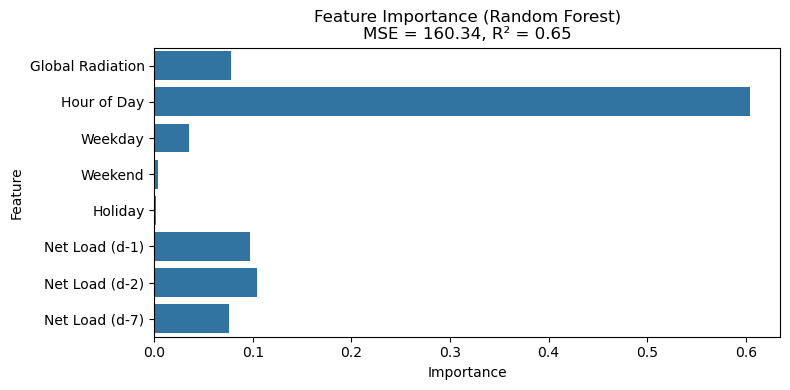

In [71]:
# 🔁 1. CSV neu einlesen (sauberer Start)
df = pd.read_csv("../data/eda_b4s_clean.csv")

# 🔁 2. Zeitspalte korrekt umwandeln
df['time'] = pd.to_datetime(df['time'])

# 🔁 3. Lag-Features und Target berechnen
df['Net Load (d-1)'] = df['Nettolast_P_kW'].shift(96)
df['Net Load (d-2)'] = df['Nettolast_P_kW'].shift(192)
df['Net Load (d-7)'] = df['Nettolast_P_kW'].shift(96 * 7)
df['Net Load (t+96)'] = df['Nettolast_P_kW'].shift(-96)

# 🔁 4. Modell-Daten vorbereiten (mit richtigen Spalten)
df_model = df[[
    'Nettolast_P_kW',
    'feature_11',      # Global Radiation
    'hour',
    'weekday',
    'is_weekend',
    'Holiday',
    'Net Load (d-1)',
    'Net Load (d-2)',
    'Net Load (d-7)',
    'Net Load (t+96)'
]].dropna().copy()

# 🔁 5. Umbenennen für bessere Lesbarkeit
df_model = df_model.rename(columns={
    'Nettolast_P_kW': 'Net Load (kW)',
    'feature_11': 'Global Radiation',
    'hour': 'Hour of Day',
    'weekday': 'Weekday',
    'is_weekend': 'Weekend',
    'Net Load (t+96)': 'Next Day Net Load'
})

# 🔁 6. Features & Target definieren
features = [
    'Global Radiation',
    'Hour of Day',
    'Weekday',
    'Weekend',
    'Holiday',
    'Net Load (d-1)',
    'Net Load (d-2)',
    'Net Load (d-7)'
]
target = 'Next Day Net Load'
X = df_model[features]
y = df_model[target]

# 🔁 7. Zeitbasierter Split (80/20)
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# 🔁 8. Random Forest Modell trainieren
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 🔁 9. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 🔁 10. Feature Importances
importances = rf.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title(f"Feature Importance (Random Forest)\nMSE = {mse:.2f}, R² = {r2:.2f}")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [72]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# RMSE berechnen
rmse = np.sqrt(mse)

# MAE berechnen
mae = mean_absolute_error(y_test, y_pred)

rmse, mae


(12.662637719316782, 9.313489700714422)